In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from pylab import arrow

# Data

In [2]:
df = pd.DataFrame(data=[[2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1],
                        [2.4,0.7,2.9,2.2,3.0,2.7,1.6,1.1,1.6,0.9]],
                        index=['R1','R2'])

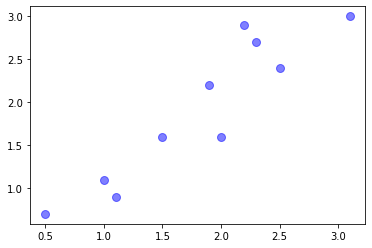

In [4]:
plt.plot(df.loc['R1'], df.loc['R2'],'o', markersize=8, color='blue', alpha=0.5, label='class1')
plt.show()

# Mean Centered

In [6]:
df1 = df.replace(df.loc['R1'],df.loc['R1']-np.mean(df.loc['R1']))
df1 = df1.replace(df1.loc['R2'],df1.loc['R2']-np.mean(df1.loc['R2']))
df1

,0,1,2,3,4,5,6,7,8,9
R1,0.69,-1.31,0.39,0.09,1.29,0.49,0.19,-0.81,-0.31,-0.71
R2,0.49,-1.21,0.99,0.29,1.09,0.79,-0.31,-0.81,-0.31,-1.01


# Covariance Matrix

In [7]:
cov_mat = np.cov(df1)
cov_mat

array([[ 0.61655556,  0.61544444],
       [ 0.61544444,  0.71655556]])

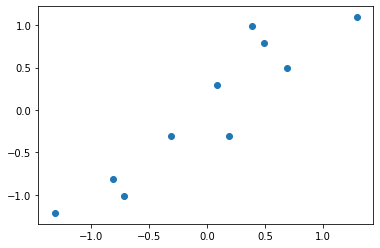

In [8]:
plt.scatter(df1.loc['R1'],df1.loc['R2'])
plt.show()

# Eigenvalues and Eigenvectors

In [9]:
eigen_vals,eigen_vectors= np.linalg.eig(cov_mat)

In [10]:
eigen_vals

array([ 0.0490834 ,  1.28402771])

In [11]:
eigen_vectors

array([[-0.73517866, -0.6778734 ],
       [ 0.6778734 , -0.73517866]])

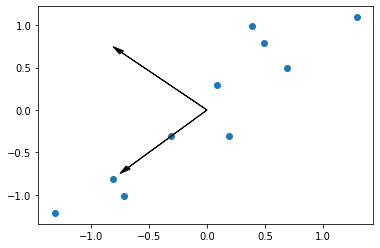

In [16]:
plt.scatter(df1.loc['R1'],df1.loc['R2'])
plt.arrow(0,0,eigen_vectors[0,0], eigen_vectors[1,0],head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.arrow(0,0,eigen_vectors[0,1], eigen_vectors[0,1],head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()

In [17]:
eigen_vectors[:, 0], eigen_vectors[:, 1] = eigen_vectors[:, 1], eigen_vectors[:, 0].copy()

In [18]:
eigen_vectors

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

# Feature vectors

In [19]:
feature_vector = np.asarray(eigen_vectors[:,0]).reshape(2,1)

In [26]:
feature_vector

array([[-0.6778734 ],
       [-0.73517866]])

In [ ]:
data = np.asarray(df1).reshape(2,10)

In [28]:
data.shape

(2, 10)

# Transformation to the new basis

In [23]:
x = np.matmul(np.transpose(feature_vector),data)

In [42]:
x

array([[-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
        -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056]])

In [43]:
feature_vector_new = np.asarray(eigen_vectors).reshape(2,2)

In [44]:
feature_vector_new 

array([[-0.6778734 , -0.73517866],
       [-0.73517866,  0.6778734 ]])

In [45]:
new_data = np.matmul(np.transpose(feature_vector_new),data)

In [46]:
new_data

array([[-0.82797019,  1.77758033, -0.99219749, -0.27421042, -1.67580142,
        -0.9129491 ,  0.09910944,  1.14457216,  0.43804614,  1.22382056],
       [-0.17511531,  0.14285723,  0.38437499,  0.13041721, -0.20949846,
         0.17528244, -0.3498247 ,  0.04641726,  0.01776463, -0.16267529]])

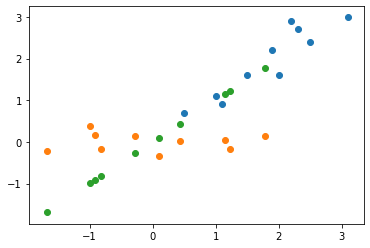

In [65]:
plt.scatter(df.loc['R1'],df.loc['R2'])
plt.scatter(new_data[0,:],new_data[1,:])
plt.scatter(x,x)
plt.show()